<p align="left">
<img width="50%" src="https://drive.google.com/uc?export=view&id=10y3NKbbk7yt7cZDMszMt04g6NquTEa4p" alt="Carbon Logo" />
</p>


# Carbon Simulator - Example

This is the example from the [twitter thread](https://twitter.com/odtorson/status/1597948494152536064). 

In [1]:
from carbon import CarbonSimulatorUI, __version__, __date__, analytics as al, CarbonPair
print(f"Carbon Version v{__version__} ({__date__})", )

Carbon Version v1.5-beta0 (6/Dec/2022)


Set up a simulator instance, with default pair ETHUSDC. Also a range of test prices.

In [2]:
ETHUSDC = CarbonPair(tknq="USDC", tknb="ETH")
Sim = CarbonSimulatorUI(pair=ETHUSDC)
prices = al.linspace(400, 3000, 500)
#prices

First we **add a FADING strategy**. Assume 

- we have **10ETH** and **10,000 USDC**
- we like to sell ETH, **SCALING OUT between 2000-2500** USDC per ETH,
- we like to buy ETH, **SCALING IN between 1000-750** USDC per ETH.

In [3]:
Sim.add_strategy("ETH", 10, 2000, 2500, 10000, 1000, 750)["orders"]

,id,pair,tkn,y_int,y,y_unit,p_start,p_end,p_marg,p_unit,lid
0,0,ETHUSDC,ETH,10.0,10.0,ETH,2000.0,2500.0,2000.0,USDC per ETH,1
1,1,ETHUSDC,USDC,10000.0,10000.0,USDC,1000.0,750.0,1000.0,USDC per ETH,0


We can look at this order by examining the simulation state

In [4]:
Sim.state()["orders"]["tkn,y_int,y,p_start,p_marg,p_end".split(",")]

,tkn,y_int,y,p_start,p_marg,p_end
0,ETH,10.0,10.0,2000.0,2000.0,2500.0
1,USDC,10000.0,10000.0,1000.0,1000.0,750.0


[calc_liquidity_approx] pair:ETHUSDC ETH USDC
[calc_liquidity_approx] ask:1 bid:1
[calc_liquidity_approx] tkn=ETH


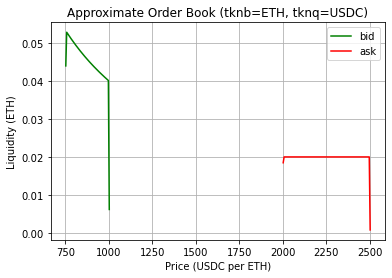

In [5]:
liq = al.calc_liquidity_approx(Sim.state()["orderuis"], prices, ETHUSDC, reverse=False)
al.plot_approx_orderbook_chart(liq)

[calc_liquidity_approx] pair:ETHUSDC ETH USDC
[calc_liquidity_approx] ask:1 bid:1
[calc_liquidity_approx] tkn=USDC


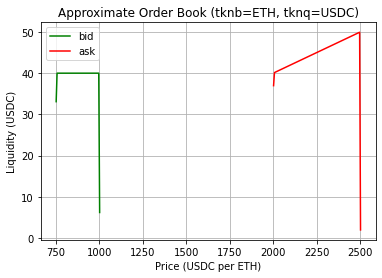

In [6]:
liqr = al.calc_liquidity_approx(Sim.state()["orderuis"], prices, ETHUSDC, reverse=True)
al.plot_approx_orderbook_chart(liqr)

Someone is now trading against the pool, BUYING 1 ETH.
The price will be driven by the 2000-2500 range.

In [7]:
Sim.trader_buys("ETH", 1)["trades"].query("aggr==True")["uid,pair,note,amt1,tkn1,amt2,tkn2,price".split(",")]

,uid,pair,note,amt1,tkn1,amt2,tkn2,price
0,0,ETHUSDC,AMM sells 1ETH buys 2021USDC,1.0,ETH,2021.339853,USDC,2021.339853


We see that that 1 ETH disappeared from the ETH curve,
and reappeared as USDC on the other curve

In [8]:
Sim.state()["orders"]["tkn,y_int,y,p_start,p_marg,p_end".split(",")]

,tkn,y_int,y,p_start,p_marg,p_end
0,ETH,10.000000,9.000000,2000.0,2042.9074,2500.0
1,USDC,12021.339853,12021.339853,1000.0,1000.0000,750.0


Someone is trading against the pool, SELLING 1 ETH
the price will be driven by the 1000-750 range

In [9]:
Sim.trader_sells("ETH", 1)["trades"].query("aggr==True")["uid,pair,note,amt1,tkn1,amt2,tkn2,price".split(",")]

,uid,pair,note,amt1,tkn1,amt2,tkn2,price
0,1,ETHUSDC,AMM sells 989USDC buys 1ETH,988.978105,USDC,1.0,ETH,988.978105


Now the ETH curve is where it was at 10 ETH, but we have taken
profits of about USD 2021 on the USDC account.

In [10]:
Sim.state()["orders"]["tkn,y_int,y,p_start,p_marg,p_end".split(",")]

,tkn,y_int,y,p_start,p_marg,p_end
0,ETH,10.000000,10.000000,2000.0,2000.000000,2500.0
1,USDC,12021.339853,11032.361748,1000.0,978.077693,750.0
